## Exploratory Data Analysis and Classification Model for Home Credit Default Risk Dataset

### Project Overview
This project involves the analysis and classification of the **Home Credit Default Risk** dataset, which consists of two main files:
- `application_train.csv`: Contains training data with features related to loan applications, including the target column `TARGET`, which indicates whether an applicant has defaulted on a loan.
- `application_test.csv`: Contains similar features without the `TARGET` column, used for making predictions.

The primary goals of this project are:
1. **Exploratory Data Analysis (EDA)**:
   - Understand the dataset structure.
   - Analyze distributions of features and identify patterns.
   - Handle missing values appropriately.
   - Identify imbalances in the data.
   - Compare training and test datasets.

2. **Data Preprocessing**:
   - Fill missing values using various strategies (e.g., median, mode, or zero).
   - Remove features with high percentages of missing data.
   - Encode categorical features using label encoding and one-hot encoding.
   - Handle outliers to improve data quality.

3. **Model Training and Evaluation**:
   - Build a classification model to predict loan defaults.
   - Use logistic regression as the classifier.
   - Employ `train_test_split` to validate the model.
   - Evaluate the model's performance using metrics like ROC-AUC.

The final model aims to balance accuracy and recall, providing a robust approach to predicting loan default risks based on the analyzed features.


In [82]:
# Import necessary libraries for data manipulation, analysis, and visualization

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [83]:
# Configure pandas to display all columns in DataFrame

pd.set_option('display.max_columns', None)

In [84]:
# Load the dataset

df = pd.read_csv('/kaggle/input/dataset/application_train.csv')

In [85]:
# Configure pandas to display all rows

pd.set_option('display.max_rows', None)

In [86]:
# Preview the first few rows of the dataset

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [87]:
# Display dataset information, including non-null counts and data types

df.info(max_cols=122)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

### For better and faster analysis we should clean our dataset from columns that have a lot of nulls. 
*There is no sense to try to teach our model based on incomplete or randomly generated data, so I made a decision to drop columns that have more than 50% of `null` values*

In [88]:
# Calculate the number of missing values in each column

missing_values = df.isnull().sum().sort_values(ascending=False)

missing_values.head(15)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MEDI    213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
FLOORSMIN_AVG               208642
FLOORSMIN_MODE              208642
FLOORSMIN_MEDI              208642
YEARS_BUILD_MEDI            204488
YEARS_BUILD_MODE            204488
dtype: int64

In [89]:
# Identify columns with more than 50% missing values

missing_values[(missing_values / df.shape[0] * 100) > 50]

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MEDI    213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
FLOORSMIN_AVG               208642
FLOORSMIN_MODE              208642
FLOORSMIN_MEDI              208642
YEARS_BUILD_MEDI            204488
YEARS_BUILD_MODE            204488
YEARS_BUILD_AVG             204488
OWN_CAR_AGE                 202929
LANDAREA_MEDI               182590
LANDAREA_MODE               182590
LANDAREA_AVG                182590
BASEMENTAREA_MEDI           179943
BASEMENTAREA_AVG            179943
BASEMENTAREA_MODE           179943
EXT_SOURCE_1                173378
NONLIVINGAREA_MODE          169682
NONLIVINGAREA_AVG           169682
NONLIVINGAREA_MEDI          169682
ELEVATORS_MEDI              163891
ELEVATORS_AVG       

In [90]:
# List columns to drop due to excessive missing values

cols_to_drop = missing_values[(missing_values / df.shape[0] * 100) > 50].index

len(cols_to_drop)

41

In [91]:
# Drop columns with more than 50% missing values

df = df.drop(columns=cols_to_drop)

In [92]:
# Verify the updated DataFrame structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

### Since we are planning to build a linear model it would be beneficial to drop columns that have low correlation with the `target`

**Why doing this? It is improving Model Simplicity and Interpretability:**

- By removing features that have little to no relationship with the `target`, we will simplify the model and make it easier to interpret and explain.
- Irrelevant features can introduce noise or multicollinearity for linear models.

In [93]:
# Identify numeric columns

binary_columns = df.select_dtypes(include=['int64', 'float64']).columns

binary_columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [94]:
# Filter numeric columns with binary values (only 2 unique values)

binary_columns = [col for col in binary_columns if df[col].nunique() == 2]

In [95]:
# Calculate correlation of binary columns with the target variable

binary_corr = df[binary_columns].corrwith(df['TARGET']).sort_values(ascending=True)

abs(binary_corr).sort_values()

FLAG_DOCUMENT_20               0.000215
FLAG_DOCUMENT_5                0.000316
FLAG_CONT_MOBILE               0.000370
FLAG_MOBIL                     0.000534
FLAG_DOCUMENT_12               0.000756
FLAG_DOCUMENT_19               0.001358
FLAG_DOCUMENT_10               0.001414
FLAG_DOCUMENT_7                0.001520
FLAG_EMAIL                     0.001758
FLAG_DOCUMENT_4                0.002672
LIVE_REGION_NOT_WORK_REGION    0.002819
FLAG_DOCUMENT_17               0.003378
FLAG_DOCUMENT_21               0.003709
FLAG_DOCUMENT_11               0.004229
FLAG_DOCUMENT_9                0.004352
FLAG_DOCUMENT_2                0.005417
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_15               0.006536
REG_REGION_NOT_WORK_REGION     0.006942
FLAG_DOCUMENT_18               0.007952
FLAG_DOCUMENT_8                0.008040
FLAG_DOCUMENT_14               0.009464
FLAG_DOCUMENT_13               0.011583
FLAG_DOCUMENT_16               0.011615
FLAG_PHONE                     0.023806


In [96]:
# Identify weakly correlated binary columns

weak_corr = abs(binary_corr)[(abs(binary_corr).sort_values(ascending=False)) < 0.0].index

weak_corr

Index([], dtype='object')

In [97]:
# Drop weakly correlated binary columns

df = df.drop(columns=weak_corr)

### Now we should decide what to do with other columns that still have up to 50% of missing values
*Since the dataset has a lot of columns with missing values, I decided to treat every column **individually** because they impact a lot to the process of teaching our model. Depending on description of every column and the distribution of values I will make a decision on which method I should use to fill null values.*

In [98]:
# Analyze missing values proportion in remaining numeric columns

binary_columns_val = df.select_dtypes(include=['int64', 'float64'])

(binary_columns_val.isnull().sum().sort_values(ascending=False)) / binary_columns_val.shape[0]

FLOORSMAX_MEDI                  0.497608
FLOORSMAX_MODE                  0.497608
FLOORSMAX_AVG                   0.497608
YEARS_BEGINEXPLUATATION_MEDI    0.487810
YEARS_BEGINEXPLUATATION_MODE    0.487810
YEARS_BEGINEXPLUATATION_AVG     0.487810
TOTALAREA_MODE                  0.482685
EXT_SOURCE_3                    0.198253
AMT_REQ_CREDIT_BUREAU_QRT       0.135016
AMT_REQ_CREDIT_BUREAU_MON       0.135016
AMT_REQ_CREDIT_BUREAU_WEEK      0.135016
AMT_REQ_CREDIT_BUREAU_DAY       0.135016
AMT_REQ_CREDIT_BUREAU_HOUR      0.135016
AMT_REQ_CREDIT_BUREAU_YEAR      0.135016
OBS_60_CNT_SOCIAL_CIRCLE        0.003320
DEF_30_CNT_SOCIAL_CIRCLE        0.003320
OBS_30_CNT_SOCIAL_CIRCLE        0.003320
DEF_60_CNT_SOCIAL_CIRCLE        0.003320
EXT_SOURCE_2                    0.002146
AMT_GOODS_PRICE                 0.000904
AMT_ANNUITY                     0.000039
CNT_FAM_MEMBERS                 0.000007
DAYS_LAST_PHONE_CHANGE          0.000003
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_7 

In [99]:
# Fill missing values in specified columns with the median

columns_with_median = [

    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG',

    'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS',

    'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_3', 'EXT_SOURCE_2',

    'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON',

    'DAYS_LAST_PHONE_CHANGE'

]

df[columns_with_median] = df[columns_with_median].fillna(df[columns_with_median].median())



# Fill missing values in specified columns with 0

columns_with_zero = [

    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_DAY',

    'AMT_REQ_CREDIT_BUREAU_WEEK', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'

]

df[columns_with_zero] = df[columns_with_zero].fillna(0)



# Fill missing categorical values with appropriate values

df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0], inplace=True)



# Drop additional unnecessary columns

df.drop(['EMERGENCYSTATE_MODE', 'TOTALAREA_MODE', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'], axis=1, inplace=True)

/tmp/ipykernel_30/369904227.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)
/tmp/ipykernel_30/369904227.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

### The next step will be excluding of outliers. 
*I will display a boxplot for each feature to easily notice tha values which may negatively affect our model. I`m going to replace some extremum values to median or simply drop unnatural ones.*

In [100]:
# Select numeric columns for outlier analysis

df_numerical = df.select_dtypes(include=['int64', 'float64'])

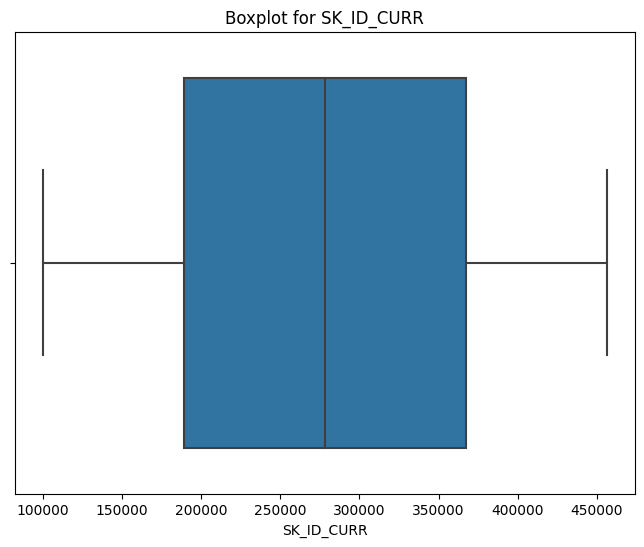

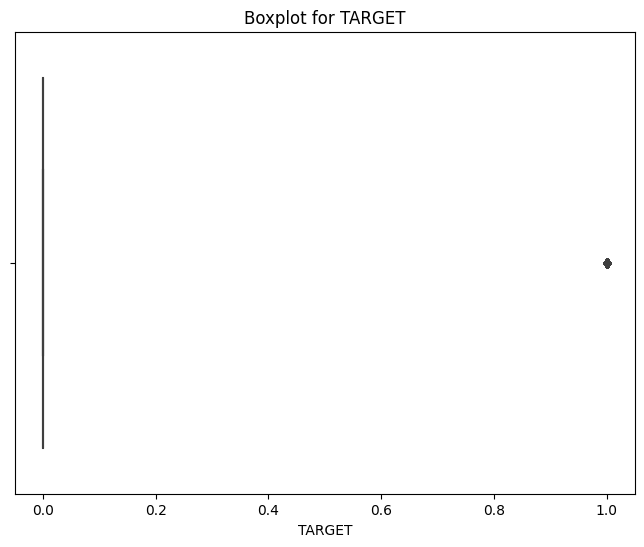

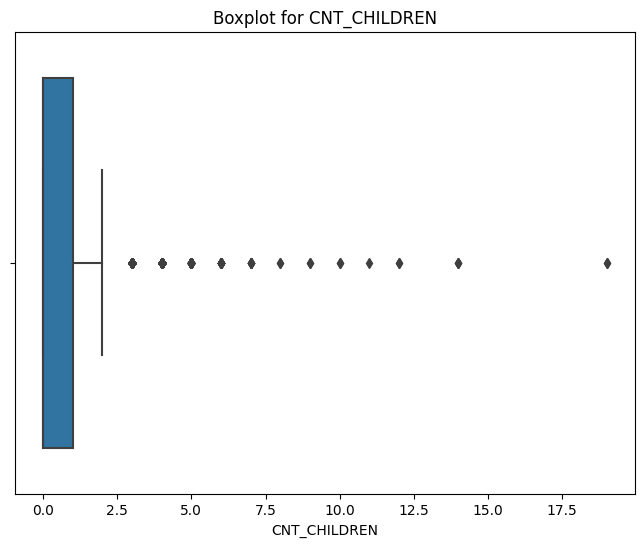

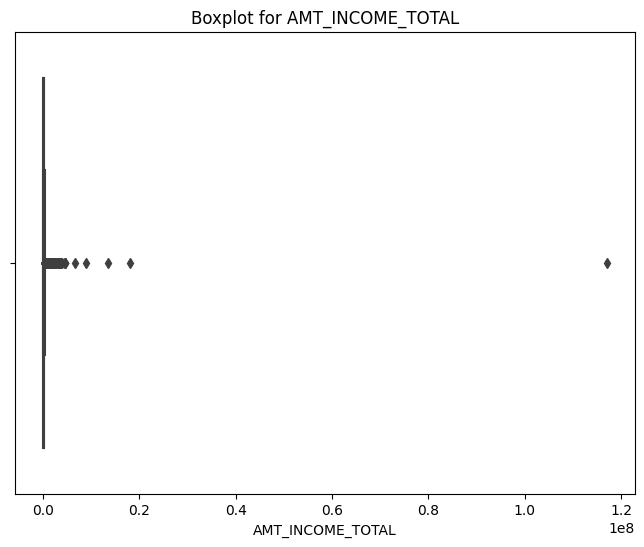

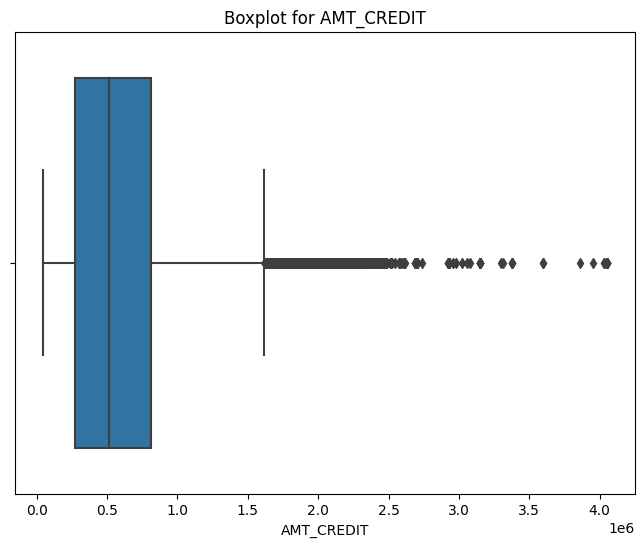

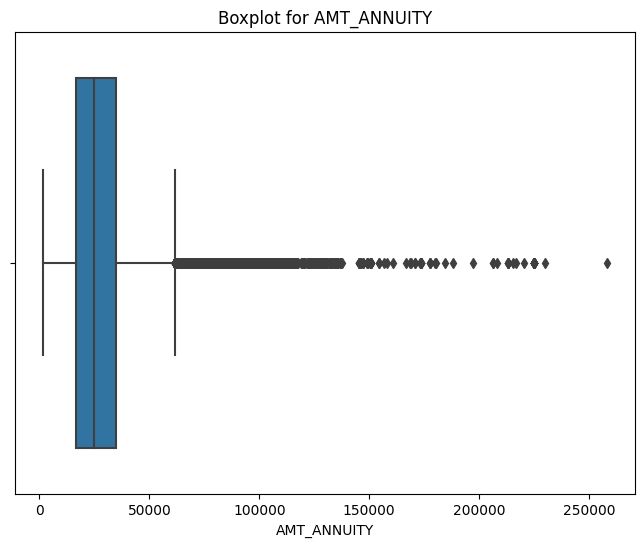

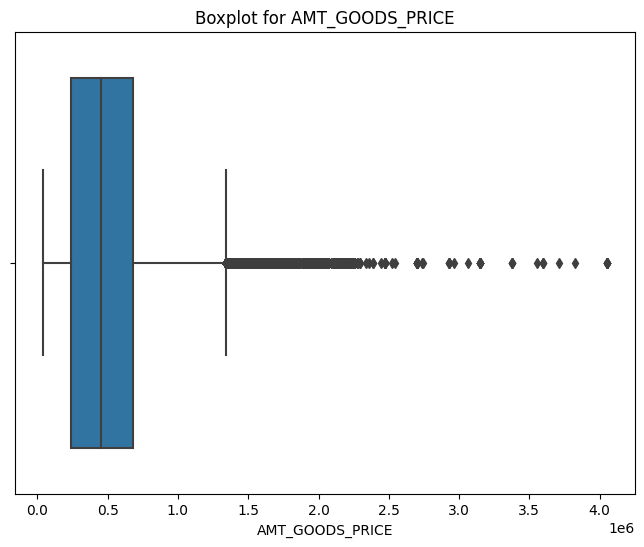

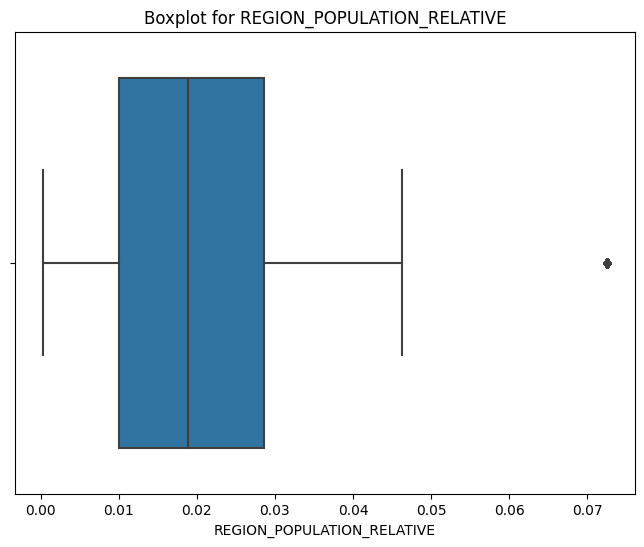

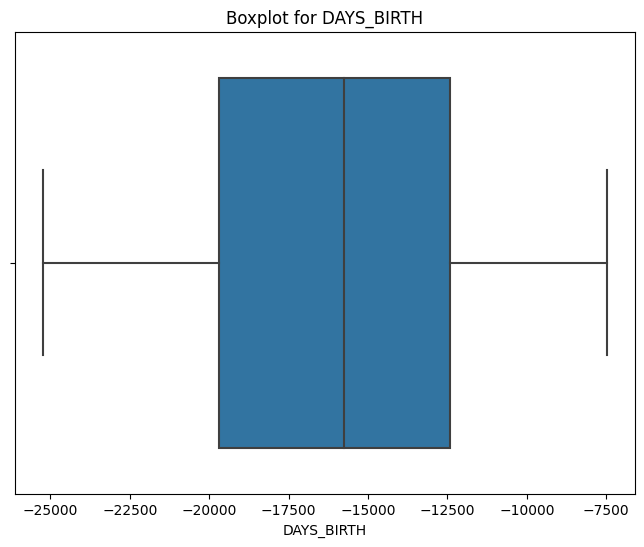

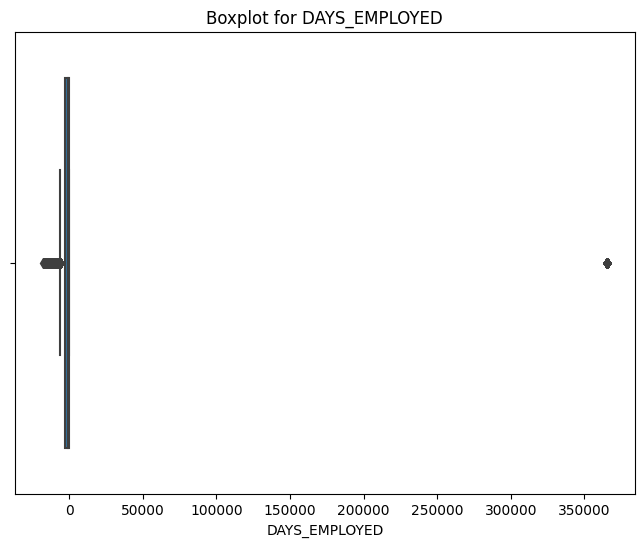

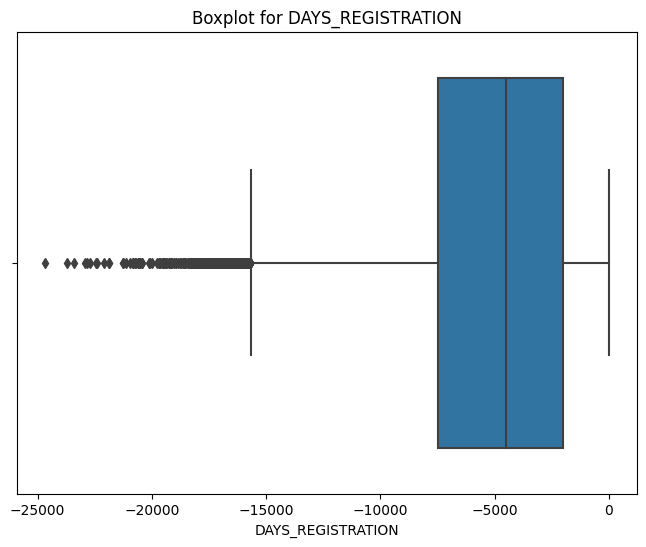

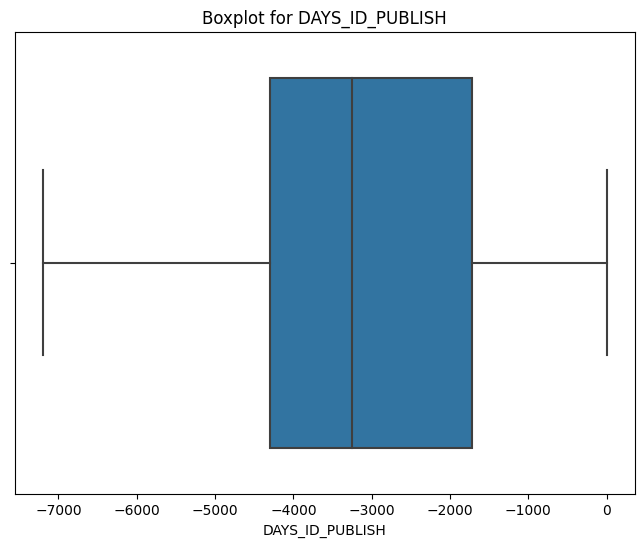

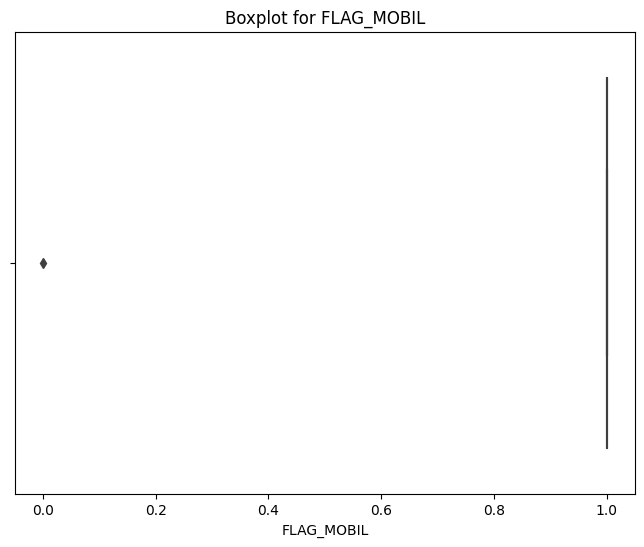

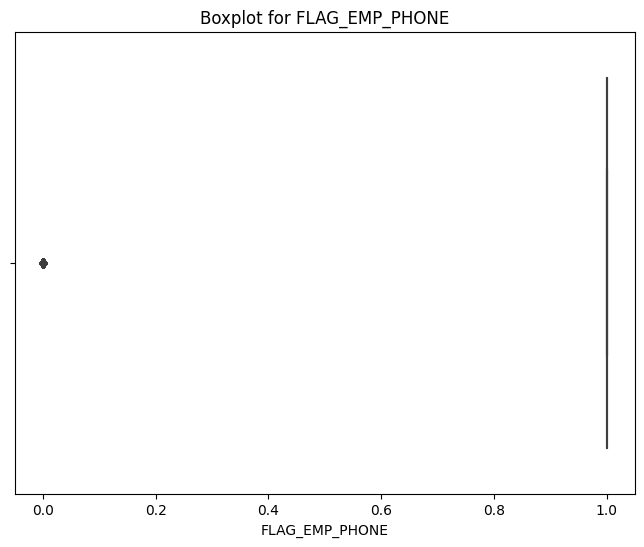

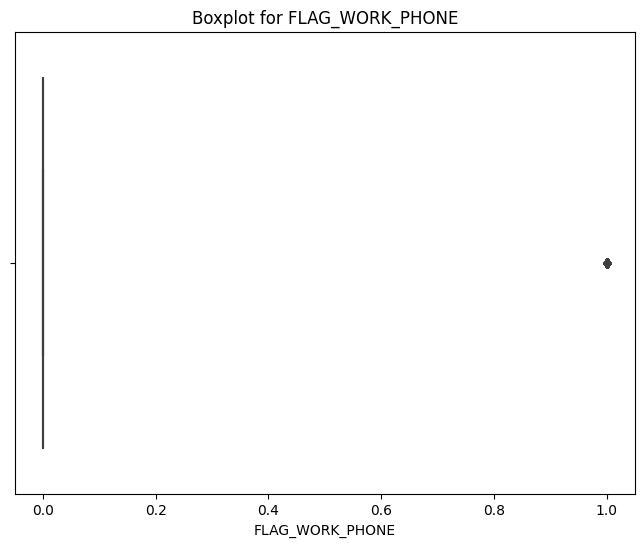

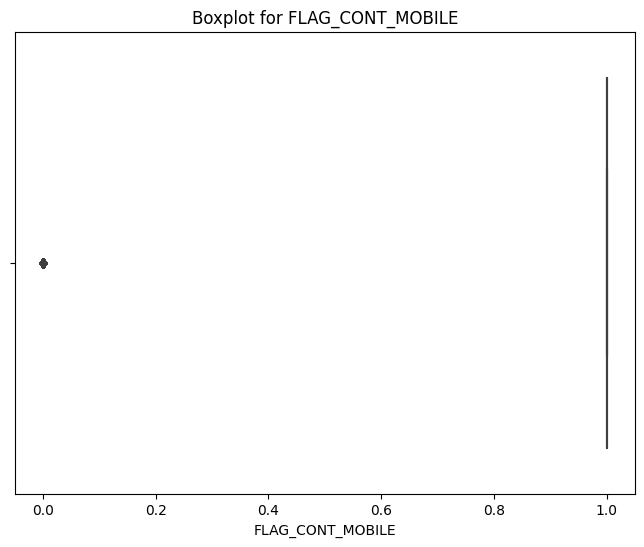

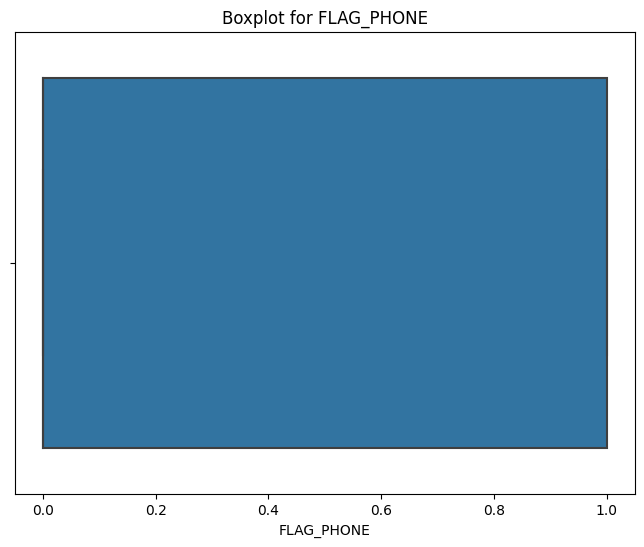

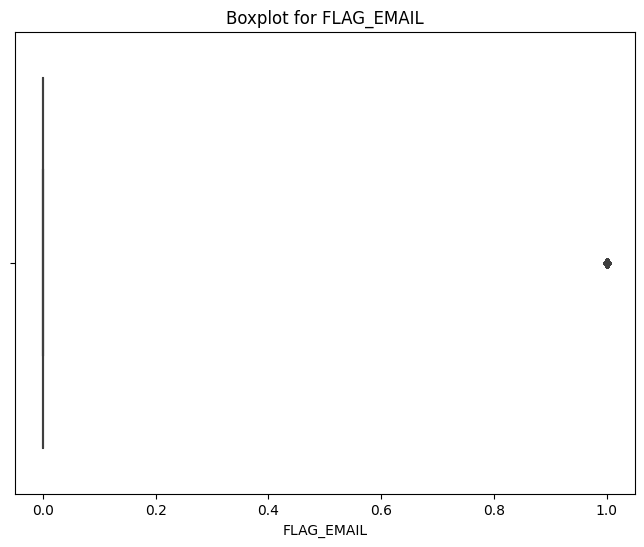

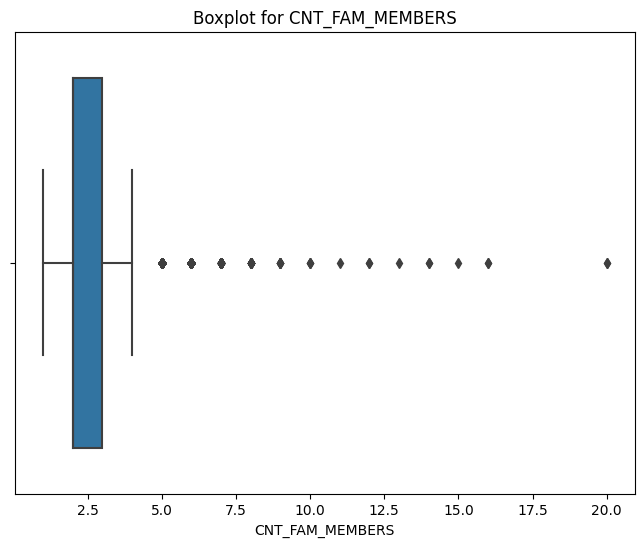

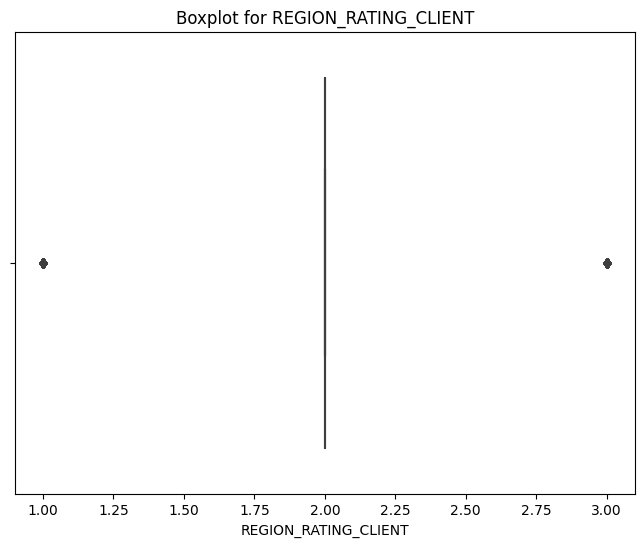

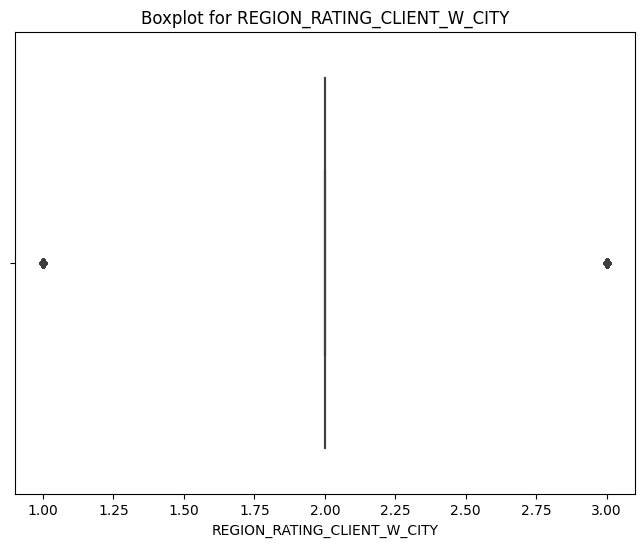

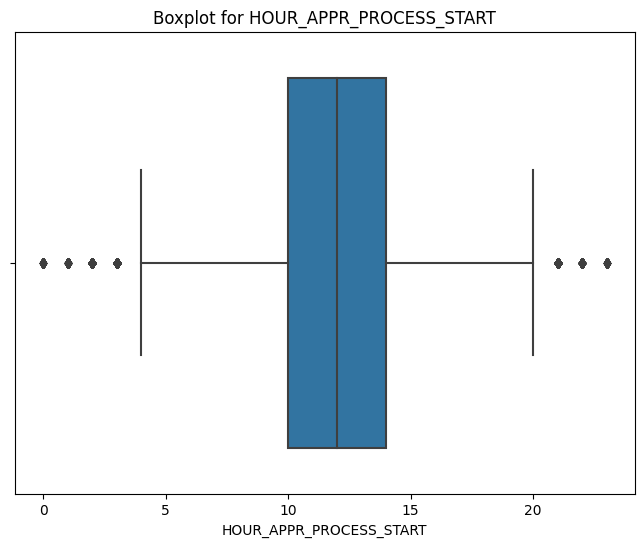

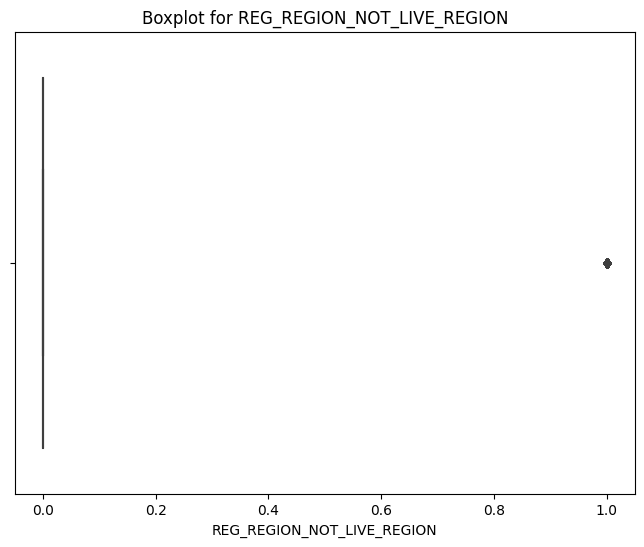

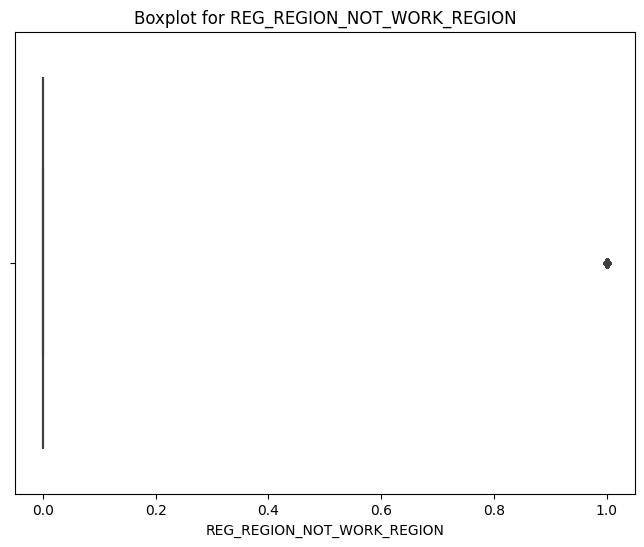

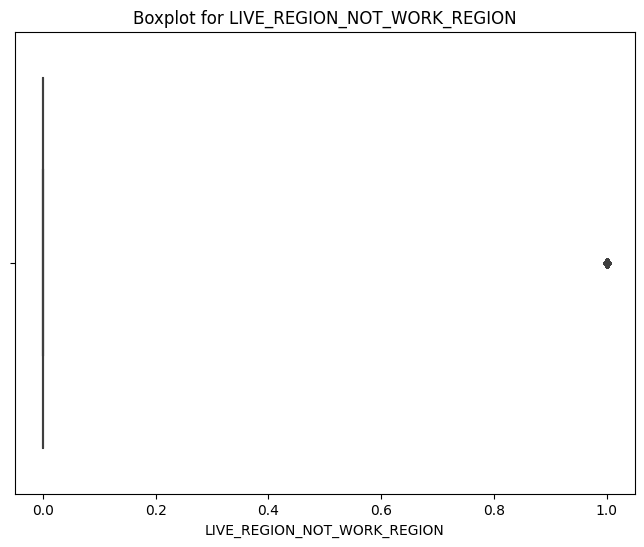

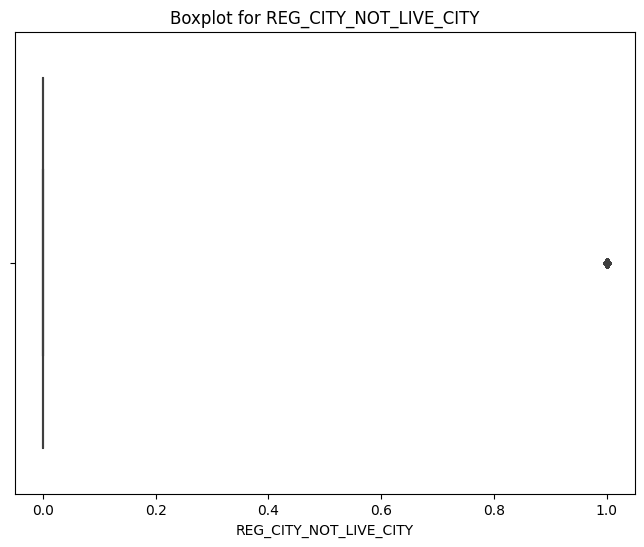

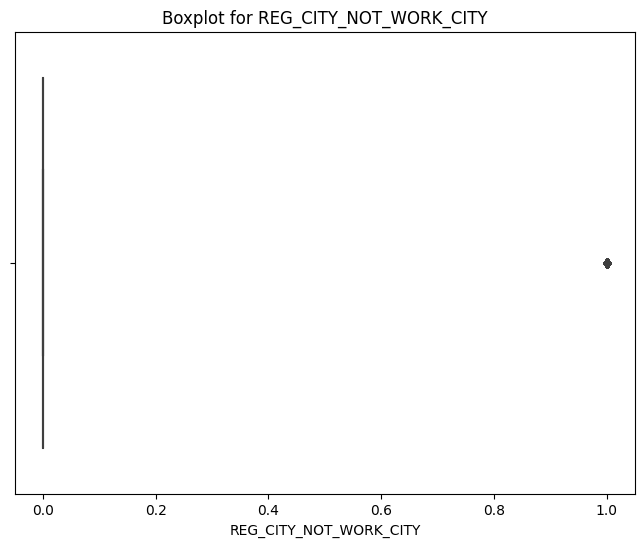

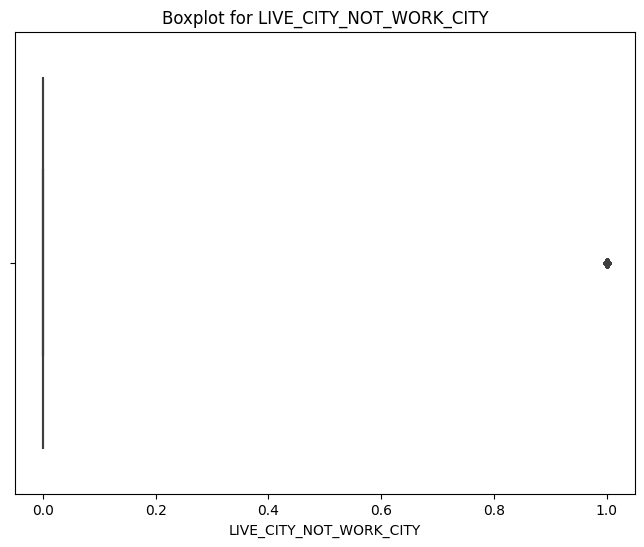

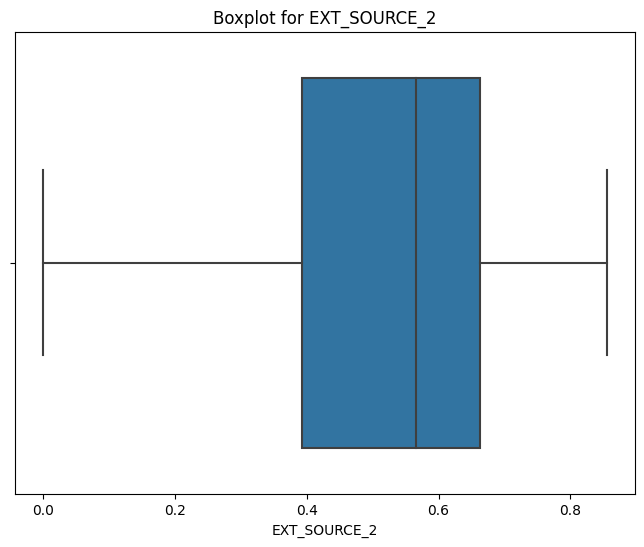

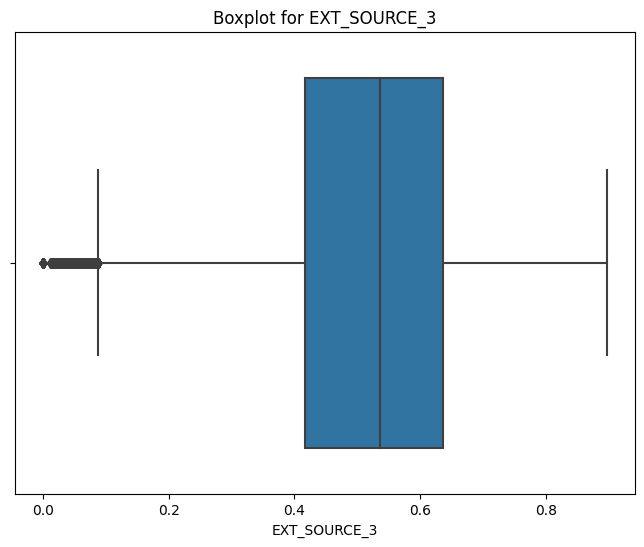

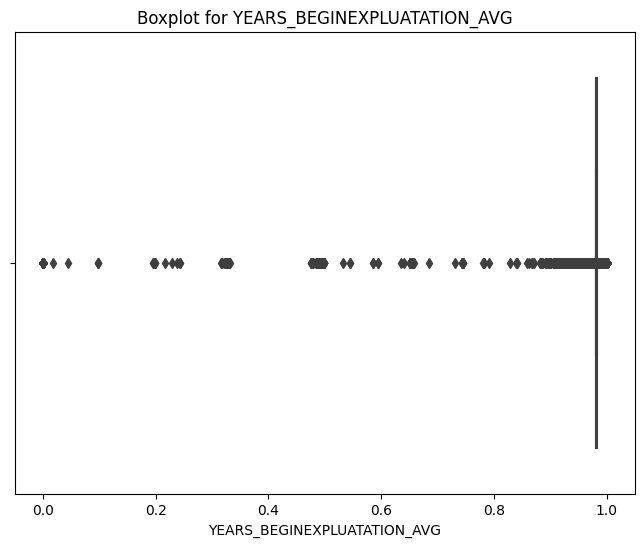

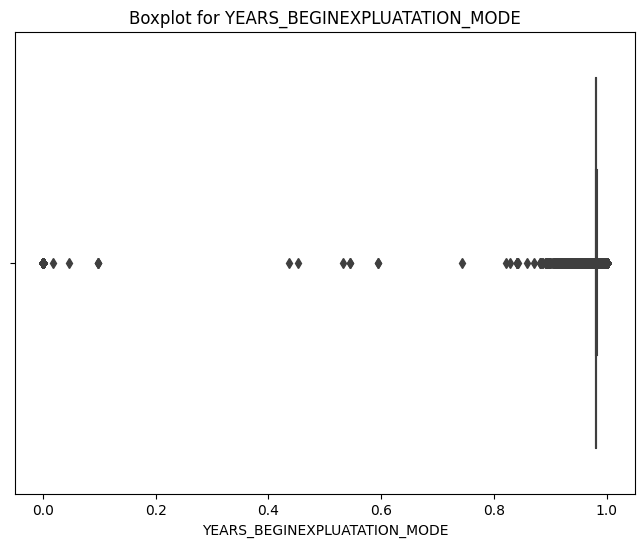

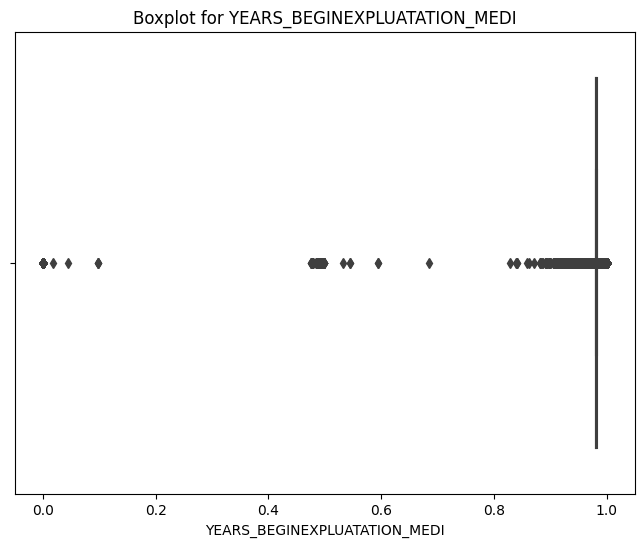

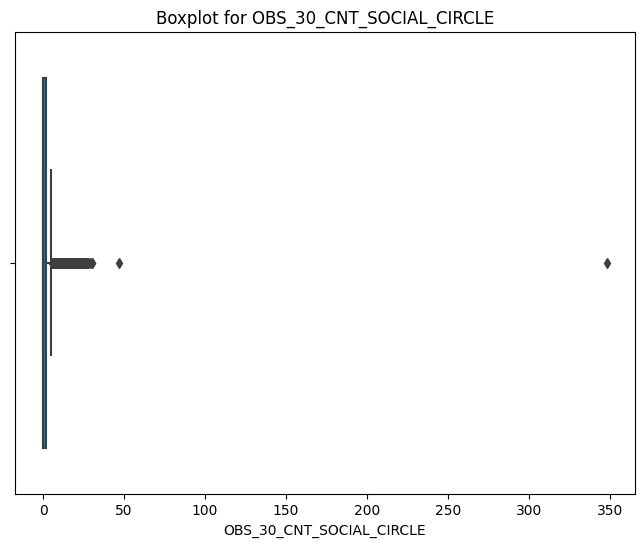

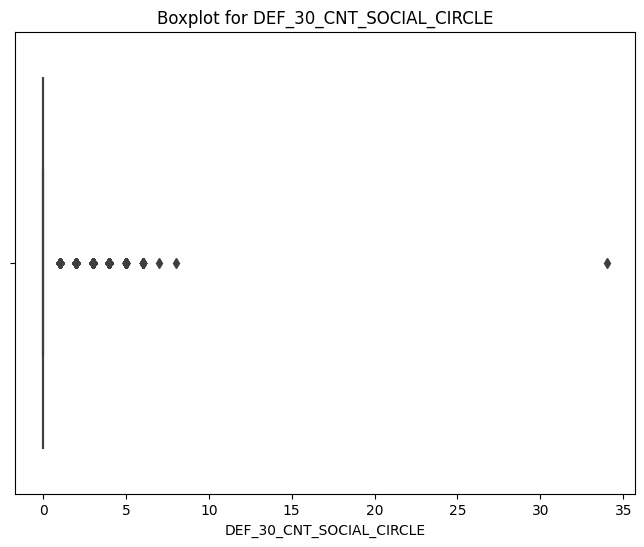

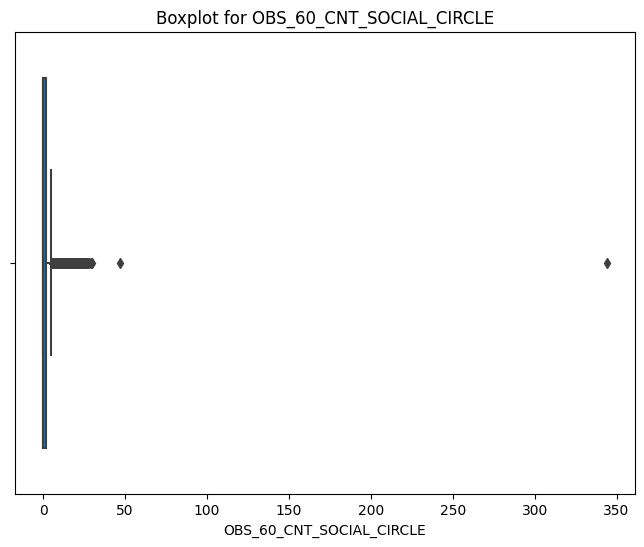

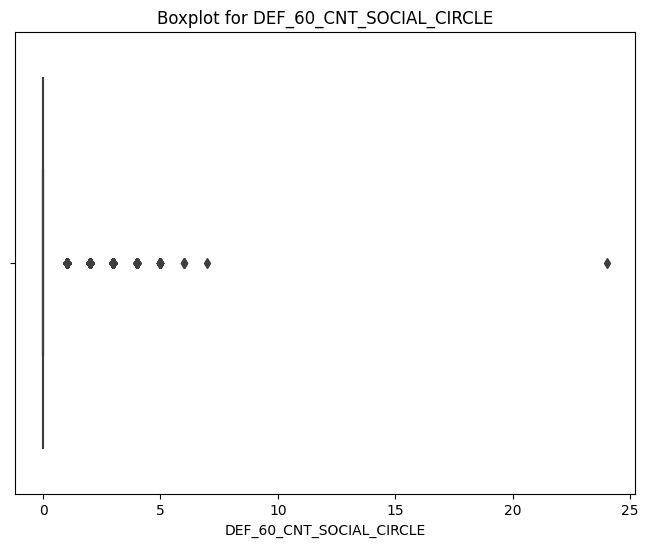

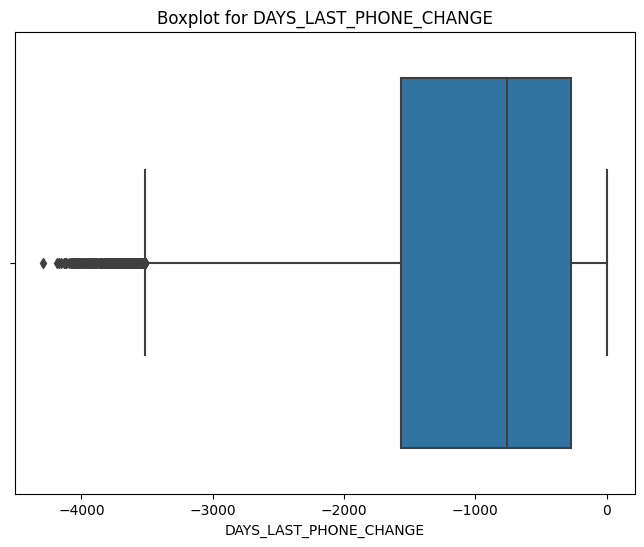

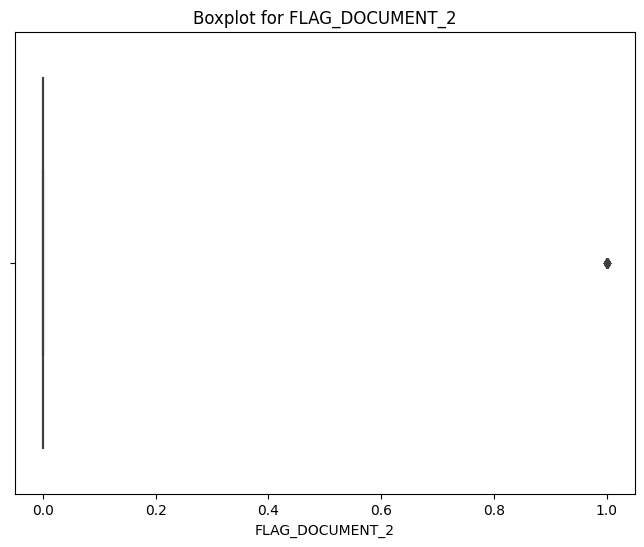

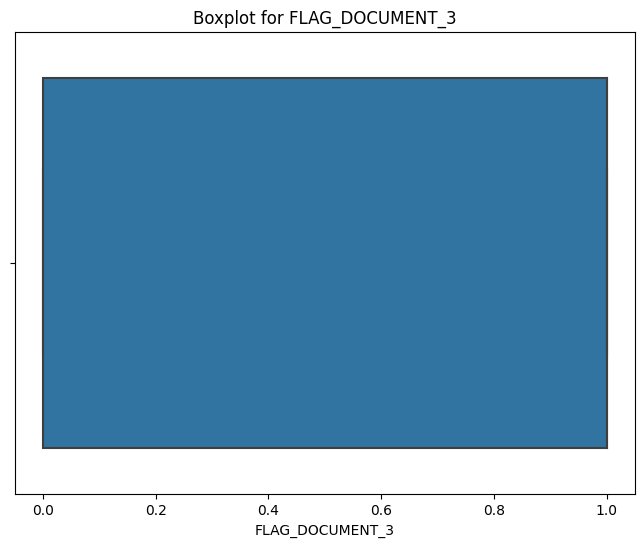

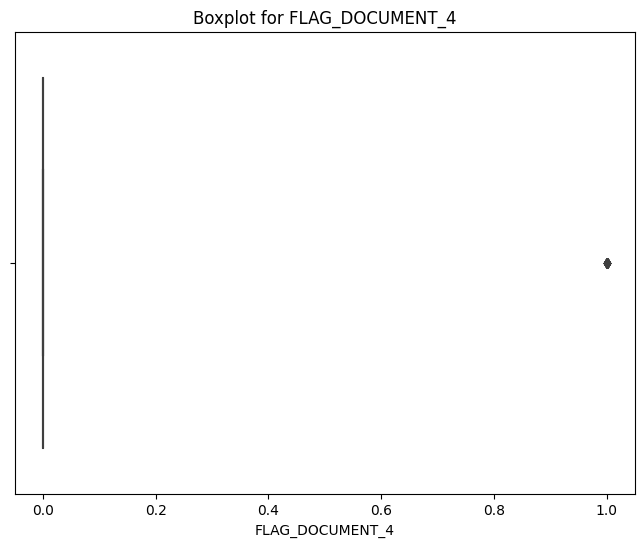

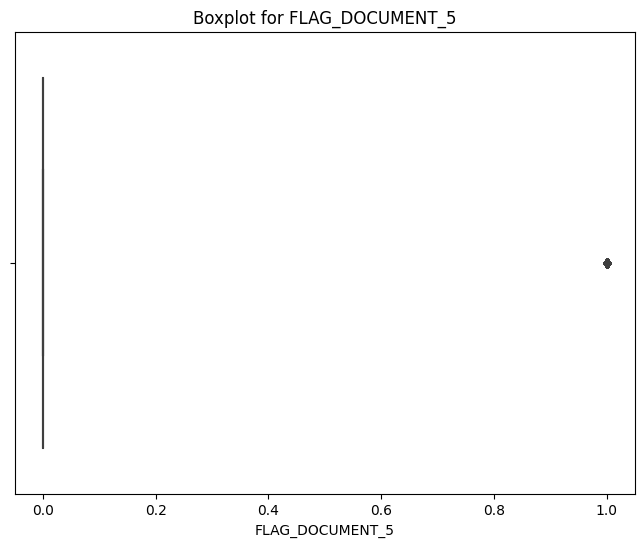

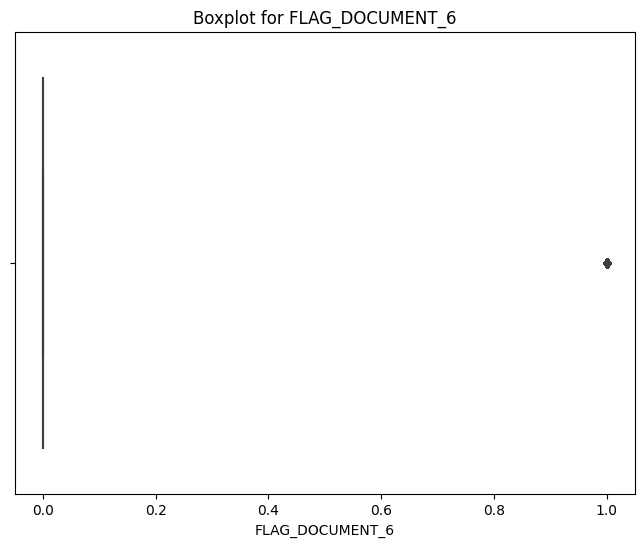

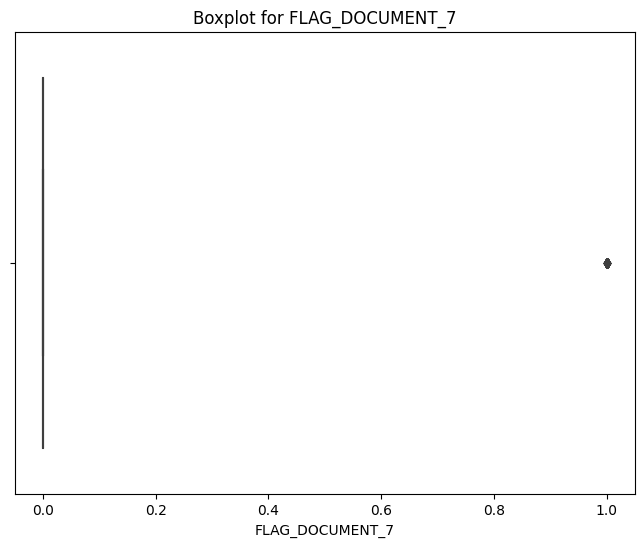

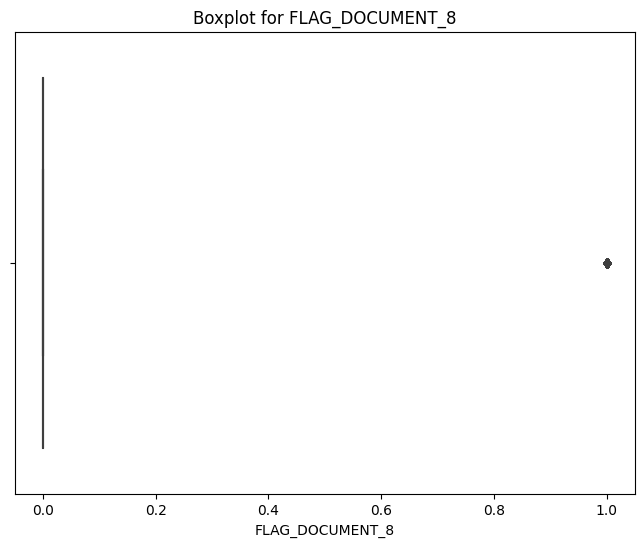

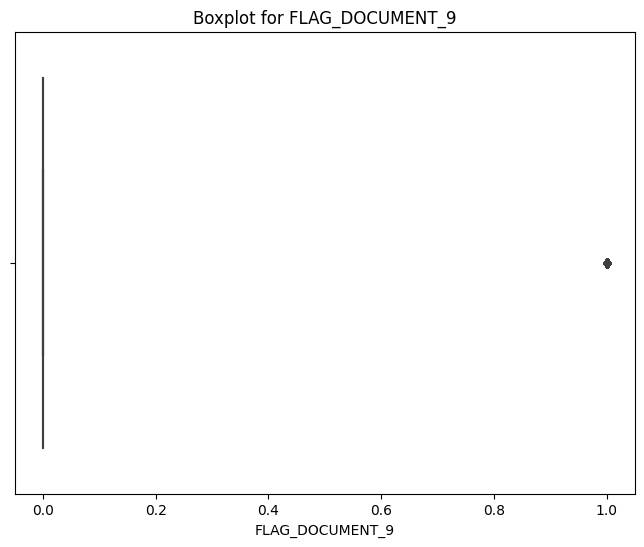

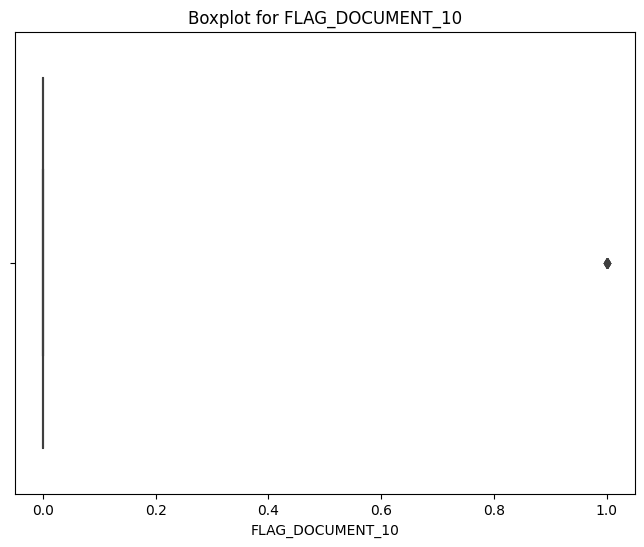

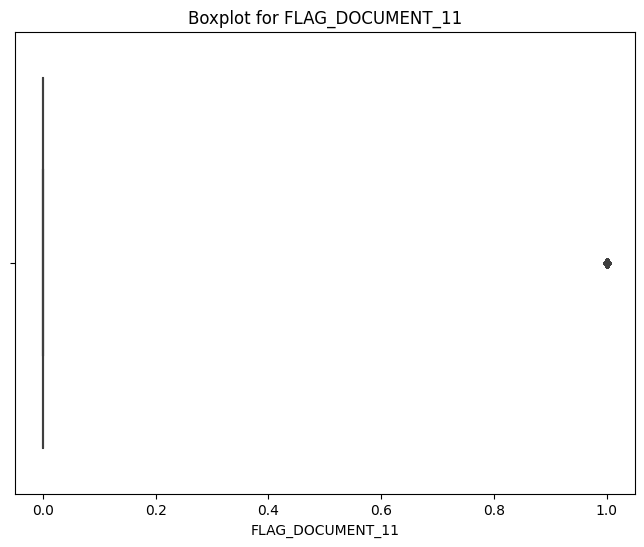

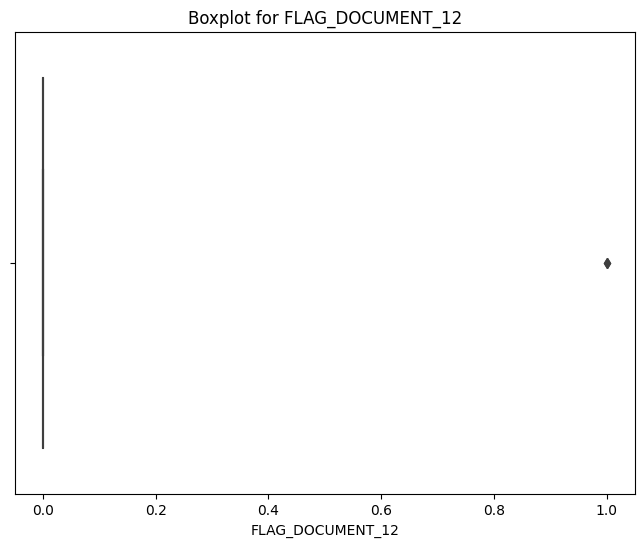

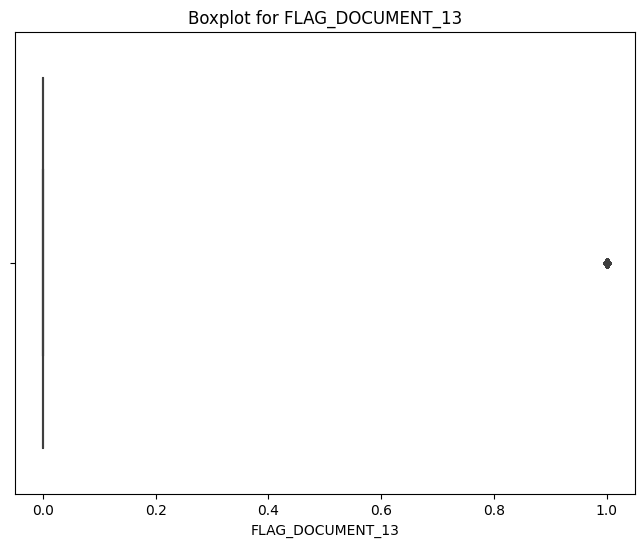

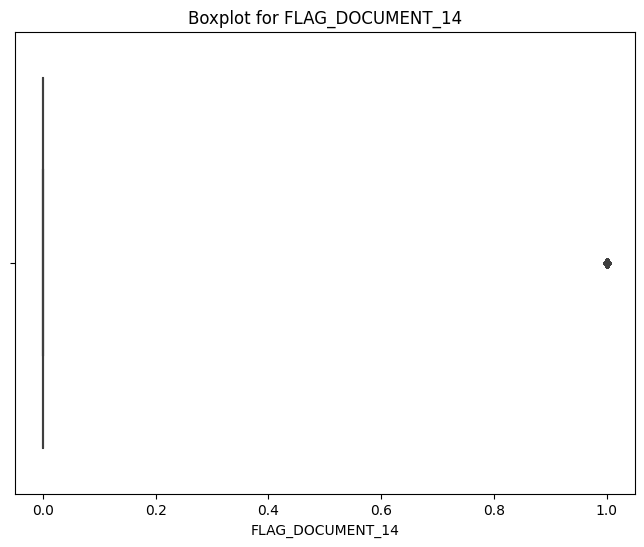

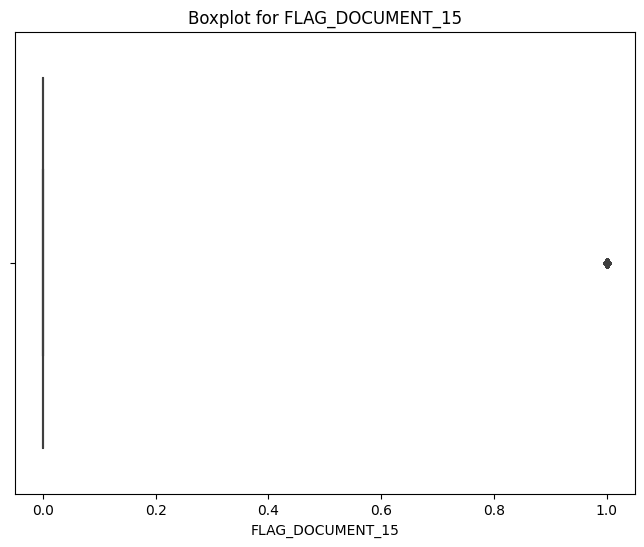

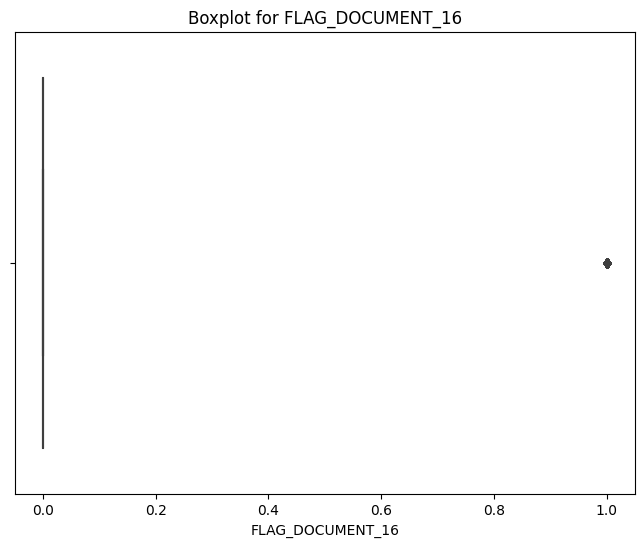

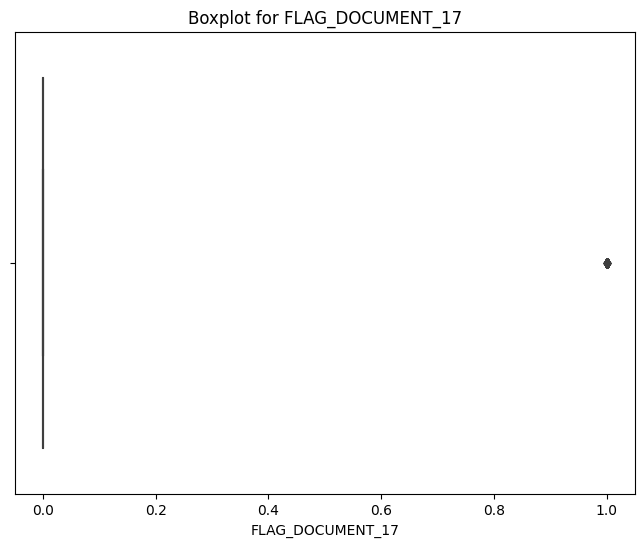

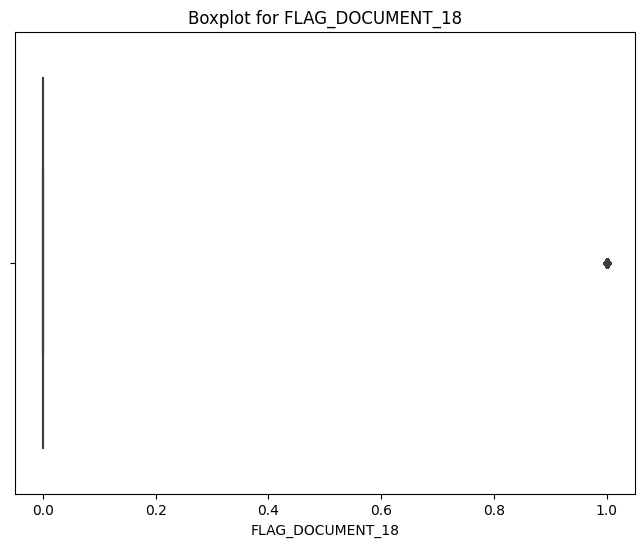

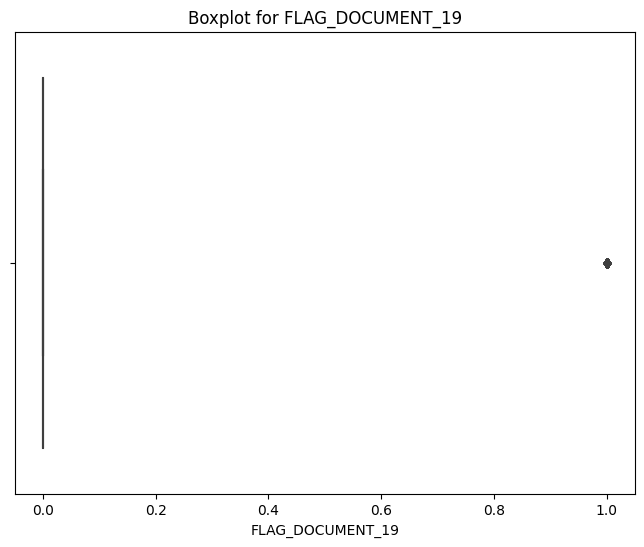

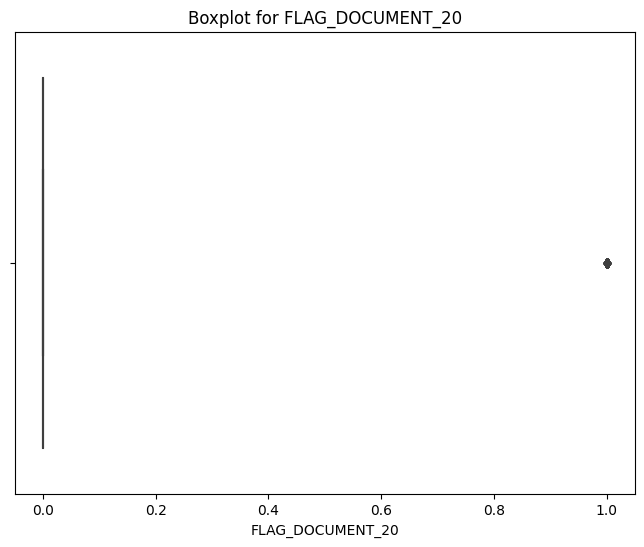

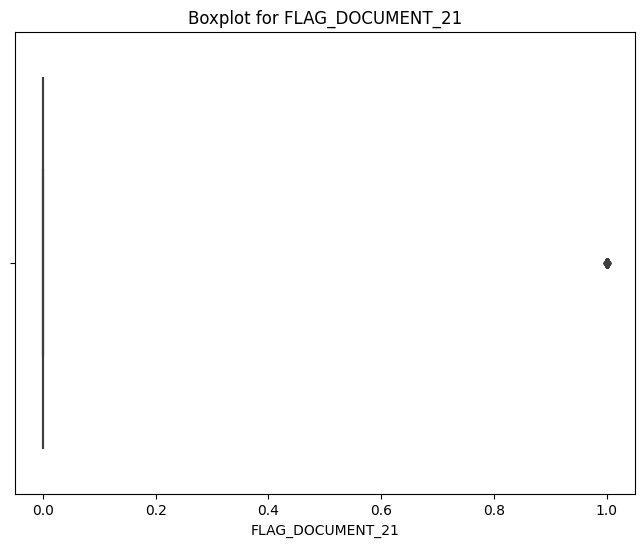

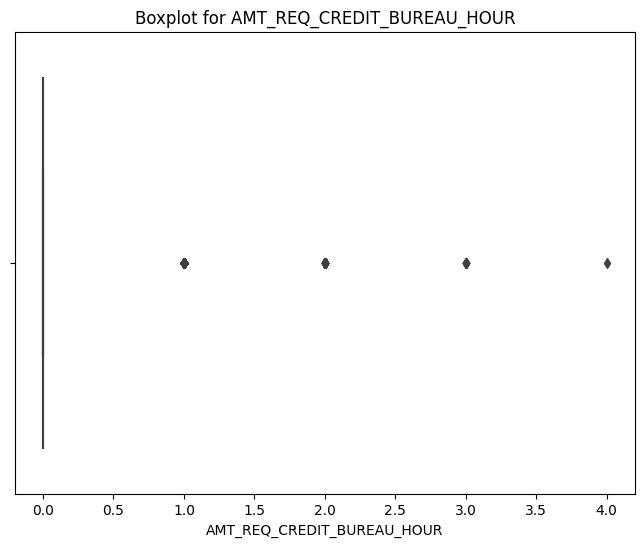

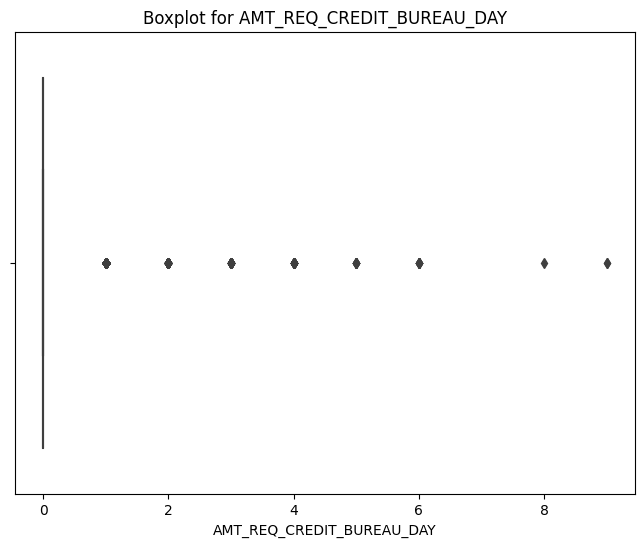

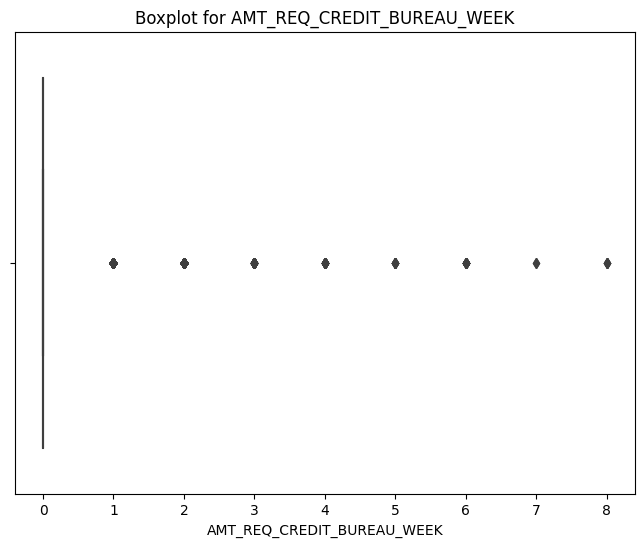

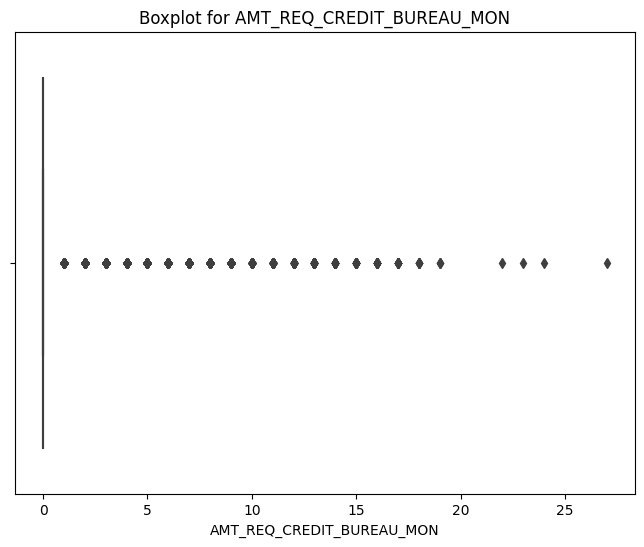

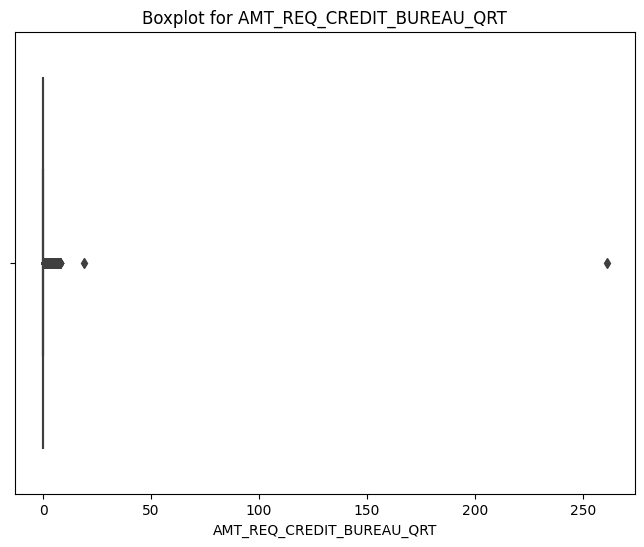

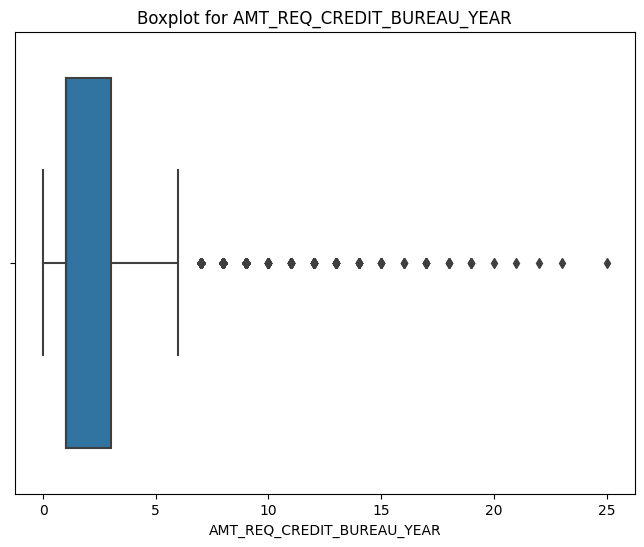

In [101]:
# Plot boxplots for each numeric column to visualize outliers

for column in df_numerical.columns:

    plt.figure(figsize=(8, 6))

    sns.boxplot(x=df_numerical[column])

    plt.title(f'Boxplot for {column}')

    plt.show()

In [102]:
# Replace outliers in 'CNT_CHILDREN' column with the median

df['CNT_CHILDREN'] = df['CNT_CHILDREN'].apply(lambda x: df['CNT_CHILDREN'].median() if x > 8 else x)

print(f"After replacing outliers with median: {df['CNT_CHILDREN'].value_counts()}")

After replacing outliers with median: CNT_CHILDREN
0.0    215383
1.0     61119
2.0     26749
3.0      3717
4.0       429
5.0        84
6.0        21
7.0         7
8.0         2
Name: count, dtype: int64


In [103]:
# Apply similar outlier handling for other columns based on quantile thresholds

quantile_99 = df['AMT_INCOME_TOTAL'].quantile(0.99)

median_value = df['AMT_INCOME_TOTAL'].median()

df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].apply(lambda x: median_value if x > quantile_99 else x)

print(df['AMT_INCOME_TOTAL'].describe())

count    307511.000000
mean     162837.077389
std       77280.413111
min       25650.000000
25%      112500.000000
50%      147150.000000
75%      202500.000000
max      472500.000000
Name: AMT_INCOME_TOTAL, dtype: float64


In [104]:
# Repeat for 'AMT_GOODS_PRICE' and other columns with custom thresholds

quantile_95 = df['AMT_GOODS_PRICE'].quantile(0.95)

median_value = df['AMT_GOODS_PRICE'].median()

df['AMT_GOODS_PRICE'] = df['AMT_GOODS_PRICE'].apply(lambda x: median_value if x > quantile_95 else x)

print(df['AMT_GOODS_PRICE'].describe())

count    3.075110e+05
mean     4.837945e+05
std      2.815280e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.305000e+06
Name: AMT_GOODS_PRICE, dtype: float64


In [105]:
# Transform 'DAYS_*' columns to absolute values

columns_to_convert = ['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED']
df[columns_to_convert] = df[columns_to_convert].abs()

In [106]:
quantile_99 = df['REGION_POPULATION_RELATIVE'].quantile(0.99)
median_value = df['REGION_POPULATION_RELATIVE'].median()
df['REGION_POPULATION_RELATIVE'] = df['REGION_POPULATION_RELATIVE'].apply(lambda x: median_value if x > quantile_99 else x)
print(df['REGION_POPULATION_RELATIVE'].describe())

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


In [107]:
# Handle remaining columns with specific thresholds similarly

threshold = 50000

df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: median_value if x > threshold else x)

print(df['DAYS_EMPLOYED'].describe())

count    307511.000000
mean       1954.851517
std        2307.066020
min           0.000000
25%         289.000000
50%        1213.000000
75%        2760.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64


In [108]:
threshold = 12

df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].apply(lambda x: median_value if x > threshold else x)

print(df['CNT_FAM_MEMBERS'].describe())

count    307511.000000
mean          2.152249
std           0.907911
min           0.018850
25%           2.000000
50%           2.000000
75%           3.000000
max          12.000000
Name: CNT_FAM_MEMBERS, dtype: float64


In [109]:
threshold = 50

df['OBS_30_CNT_SOCIAL_CIRCLE'] = df['OBS_30_CNT_SOCIAL_CIRCLE'].apply(lambda x: median_value if x > threshold else x)

print(df['OBS_30_CNT_SOCIAL_CIRCLE'].describe())

count    307511.000000
mean          1.416392
std           2.315531
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          47.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


In [110]:
threshold = 50

df['OBS_60_CNT_SOCIAL_CIRCLE'] = df['OBS_60_CNT_SOCIAL_CIRCLE'].apply(lambda x: median_value if x > threshold else x)

print(df['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

count    307511.000000
mean          1.399508
std           2.295541
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          47.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


In [111]:
threshold = 10

df['DEF_30_CNT_SOCIAL_CIRCLE'] = df['DEF_30_CNT_SOCIAL_CIRCLE'].apply(lambda x: median_value if x > threshold else x)

print(df['DEF_30_CNT_SOCIAL_CIRCLE'].describe())

count    307511.000000
mean          0.142834
std           0.441834
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


In [112]:
threshold = 10

df['DEF_60_CNT_SOCIAL_CIRCLE'] = df['DEF_60_CNT_SOCIAL_CIRCLE'].apply(lambda x: median_value if x > threshold else x)

print(df['DEF_60_CNT_SOCIAL_CIRCLE'].describe())

count    307511.000000
mean          0.099639
std           0.359158
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


In [113]:
threshold = 50

df['AMT_REQ_CREDIT_BUREAU_QRT'] = df['AMT_REQ_CREDIT_BUREAU_QRT'].apply(lambda x: median_value if x > threshold else x)

print(df['AMT_REQ_CREDIT_BUREAU_QRT'].describe())

count    307511.000000
mean          0.228782
std           0.576618
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          19.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


### The last step of preprocessing is going to be converting categorical values.
*We have to convert all our categorical values into binary using `get_dummies` method*

In [114]:
# Drop unexpected value in gender

df = df.drop(df[df['CODE_GENDER'] == 'XNA'].index)

In [115]:
# Define columns with binary values so that they are easy to convert 

binary_columns = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']

binary_columns

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [116]:
# Convert those columns into an appropriate format

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in binary_columns:
    df[col] = encoder.fit_transform(df[col])

print(df[binary_columns].head(5))


   NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY
0                   0            1             0                1
1                   0            0             0                0
2                   1            1             1                1
3                   0            0             0                1
4                   0            1             0                1


In [117]:
# It is better to drop columns with a lot of values and low correlation to not overload our model 

df = df.drop(columns='ORGANIZATION_TYPE')

df = df.drop(columns='WEEKDAY_APPR_PROCESS_START')

In [118]:
# Convert those columns into an appropriate format

df = pd.get_dummies(df, columns=[

    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',

    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'

], drop_first=True)

# Model Training and Evaluation
**`LogisticRegression`**

*Logistic Regression is well-suited for this project as it is specifically designed for binary classification, making it ideal for predicting loan default (0 or 1). It is computationally efficient, easy to interpret, and works well with imbalanced data when using class weighting. Additionally, its probabilistic outputs align perfectly with the ROC-AUC evaluation metric, providing a strong baseline for performance comparison.*

In [119]:
# Some import statements

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler

from scipy.stats import uniform

from sklearn.utils.class_weight import compute_class_weight

In [120]:
# Split the data into training and testing sets with stratification

X = df.drop('TARGET', axis=1)

y = df['TARGET']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [121]:
# Split the data into training and testing sets with stratification

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [122]:
# Standardize the feature data to improve model performance

param_dist = {

    'C': uniform(0.1, 10),  # Равномерное распределение

    'penalty': ['l2'],

    'solver': ['liblinear']

}

In [123]:
# Define the parameter distribution for hyperparameter tuning using RandomizedSearchCV

random_search = RandomizedSearchCV(LogisticRegression(random_state=42, max_iter=1000),

                                   param_distributions=param_dist,

                                   n_iter=10,  # Количество итераций

                                   cv=3,

                                   scoring='roc_auc',

                                   n_jobs=1,

                                   random_state=42)

In [124]:
# Fit the logistic regression model using randomized search

random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_jobs=1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b027a3eedd0>,
                                        'penalty': ['l2'],
                                        'solver': ['liblinear']},
                   random_state=42, scoring='roc_auc')

In [125]:
# Get the best model based on the search

best_model = random_search.best_estimator_

print("Best parameters:", random_search.best_params_)

Best parameters: {'C': 0.6808361216819946, 'penalty': 'l2', 'solver': 'liblinear'}


In [126]:
# Predict the target for the test set

y_pred = best_model.predict(X_test_scaled)

y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

In [127]:
# Evaluate the model's performance on the test set

print("Accuracy:", accuracy_score(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

print(classification_report(y_test, y_pred))

Accuracy: 0.919189619849761
ROC-AUC Score: 0.741237198515081
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56537
           1       0.47      0.01      0.02      4965

    accuracy                           0.92     61502
   macro avg       0.70      0.50      0.49     61502
weighted avg       0.88      0.92      0.88     61502



In [128]:
# Train another logistic regression model with class weights balanced

best_params = {'C': 0.6808361216819946, 'penalty': 'l2', 'solver': 'liblinear'}

logreg_balanced = LogisticRegression(**best_params, random_state=42, max_iter=1000, class_weight='balanced')

In [129]:
# Fit the model with balanced class weights

logreg_balanced.fit(X_train_scaled, y_train)

LogisticRegression(C=0.6808361216819946, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')

In [130]:
# Predict with the balanced model

y_pred_balanced = logreg_balanced.predict(X_test_scaled)

y_pred_proba_balanced = logreg_balanced.predict_proba(X_test_scaled)[:, 1]

In [131]:
# Evaluate the balanced model

print("Accuracy (balanced):", accuracy_score(y_test, y_pred_balanced))

print("ROC-AUC Score (balanced):", roc_auc_score(y_test, y_pred_proba_balanced))

print(classification_report(y_test, y_pred_balanced))

Accuracy (balanced): 0.686286624825209
ROC-AUC Score (balanced): 0.7411116081313557
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56537
           1       0.16      0.67      0.26      4965

    accuracy                           0.69     61502
   macro avg       0.56      0.68      0.53     61502
weighted avg       0.89      0.69      0.76     61502





---

**Project Conclusion**

In this project, we developed and evaluated a logistic regression model to predict credit default risk. The process involved data preprocessing, hyperparameter tuning using `RandomizedSearchCV`, and balancing class weights to address the class imbalance in the target variable.

### Key Findings:

- **Baseline Model:**
  - **ROC-AUC:** ~0.74  
  - The model demonstrated reasonable performance but had low recall for the minority class (TARGET = 1), indicating poor identification of high-risk clients.

- **Balanced Model:**
  - **ROC-AUC:** ~0.74  
  - **Accuracy:** 68.6%  
  - Introducing class weighting significantly improved recall for the minority class, achieving a better balance between precision and recall.

### Next Steps:

1. **Explore advanced models** such as Random Forests or Gradient Boosting for potential performance gains.
2. **Feature engineering and selection** to identify the most predictive variables.
3. **Validate the model on unseen test data** to ensure generalizability.

This project provides a strong foundation for credit risk prediction and underscores the importance of handling class imbalance in financial datasets.g and beyond.g and beyond.g and beyond.domains.
